# Introduction to Logistic Regression

Despite being a classification algorithm, logistic regression is called a regression algorithm because it uses the same basic principle as linear regression, which is to model the relationship between the input features and the output variable. The difference is that logistic regression models the relationship between the input features and the probability of the positive class, rather than the actual output values.


The logistic regression model uses a logistic function to transform the linear combination of the input features into a probability value that ranges between 0 and 1. This probability value is then used to classify the input data into one of the two classes.

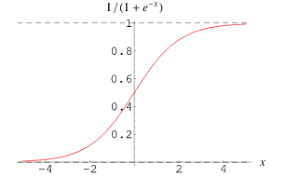

---

Sigmoid Function Formulae

f(x) = 1 / (1 + e^(-x))

where f(x) is the output value, x is the input value, and e is the mathematical constant approximately equal to 2.71828.

Suppose you have the following variables

Age (continuous)
Gender (binary: 1 for male, 0 for female)
Blood pressure (continuous)
Cholesterol level (continuous)
Disease status (binary: 1 for positive, 0 for negative)

Then the logistic regression equation would be

p = 1 / (1 + e^-(b0 + b1Age + b2Gender + b3BloodPressure + b4Cholesterol))

where p is the probability of a patient having the disease, e is the mathematical constant approximately equal to 2.71828, and b0, b1, b2, b3, and b4 are the coefficients that the model learns.

---

## Applications of logistic regression
Healthcare: Logistic regression is commonly used in healthcare to predict the likelihood of a patient having a certain disease based on their symptoms and medical history. It can also be used to predict the risk of complications after surgery or treatment.

Finance: Logistic regression is used in finance to predict the likelihood of loan default or credit card fraud based on customer data.

Marketing: Logistic regression is used in marketing to predict the likelihood of customer churn or the probability of a customer buying a product based on their demographic and behavioral data.

Social sciences: Logistic regression is used in social sciences to analyze survey data and predict the likelihood of certain behaviors or attitudes based on demographic and other variables.

Engineering: Logistic regression is used in engineering to predict the likelihood of equipment failure or product defects based on input variables such as temperature, humidity, and pressure.

Image recognition: Logistic regression is used in image recognition to classify images into different categories based on their features.



## Problem Statement
- Want to predict who among our employees is likely to leave

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot  import figure
import seaborn as sns
import numpy as np
%matplotlib inline


In [2]:
df=pd.read_csv('emp_analytics.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,1,0,low
1,0.80,0.86,5,262,6,0,1,0,medium
2,0.11,0.88,7,272,4,0,1,0,medium
3,0.72,0.87,5,223,5,0,1,0,low
4,0.37,0.52,2,159,3,0,1,0,low


In [ ]:
#Those who left - 0 Those who haven't left- 1

In [4]:
df.shape

(14999, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(1)
memory usage: 1.0+ MB


In [6]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
salary                   0
dtype: int64

In [7]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary'],
      dtype='object')

## Feature Engineering


## Ordinal Encoding Using Sklearn

Encoding in machine learning refers to the process of converting categorical variables or data into numerical representations that machine learning algorithms can understand and process. Categorical variables are those that represent qualitative or nominal characteristics rather than numerical quantities.

In [8]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [9]:
from sklearn.preprocessing import OrdinalEncoder

In [10]:
encoder=OrdinalEncoder(categories=[['low','medium','high']],dtype=int)

In [11]:
encoded_salary=encoder.fit_transform(df[['salary']])


In [12]:
encoded_salary

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [13]:
salary_encoded=pd.DataFrame(encoded_salary,columns=['salary_encoded'])

In [14]:
salary_encoded

,salary_encoded
0,0
1,1
2,1
3,0
4,0
...,...
14994,0
14995,0
14996,0
14997,0


In [15]:
## Merge back to dataset
df=pd.concat([df,salary_encoded],axis='columns')

In [16]:
df.drop('salary',axis=1,inplace=True)

In [ ]:
df

## Balance the Dataset

Balancing datasets in machine learning refers to the process of addressing class imbalance, where the number of instances in different classes is significantly skewed. Class imbalance occurs when one class has a much larger number of instances compared to other classes.

Why we need to handle Imbalanced Datasets
- Improved Model Performance: Class imbalance can heavily influence the performance of machine learning models. When one class is dominant, the model may become biased towards predicting the majority class, leading to poor generalization and accuracy. Balancing the dataset helps prevent such biases and allows the model to learn from representative examples of all classes, leading to more reliable and accurate predictions.

- Equal Representation: Each class in a dataset typically represents a distinct pattern or phenomenon. Imbalanced datasets can cause models to neglect the minority class, leading to incomplete understanding or inadequate predictions for that class. Balancing the dataset ensures that each class has equal representation, enabling the model to learn and capture the characteristics of all classes effectively.

- Mitigating Evaluation Biases: Evaluation metrics like accuracy can be misleading in the presence of class imbalance. A model that predicts only the majority class could achieve high accuracy but may fail to perform well on the minority class. Balancing the dataset allows for a fair evaluation of the model's performance across all classes, enabling more meaningful assessment and comparison of different models.

There are various techniques to balance datasets, including oversampling the minority class, undersampling the majority class, or using a combination of both. The specific approach depends on the dataset characteristics, the modeling algorithm, and the problem at hand.

## Imbalanced dataset

In [18]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

<AxesSubplot:xlabel='left', ylabel='count'>

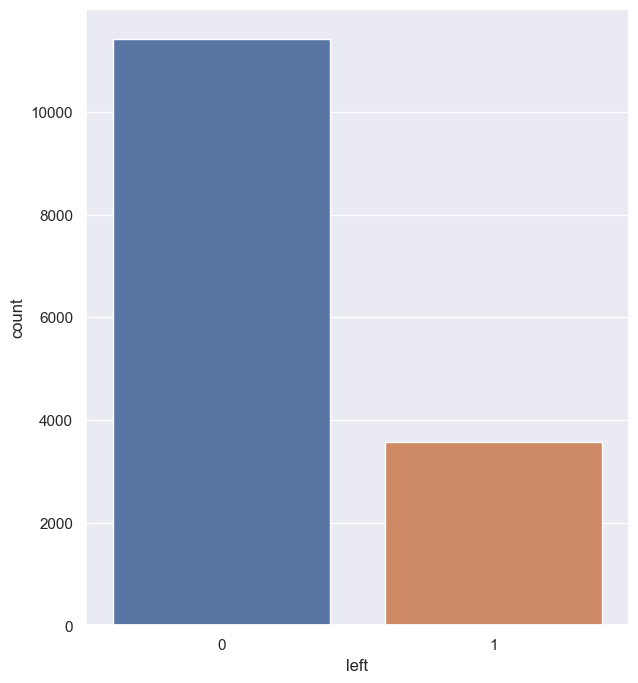

In [19]:
sns.set(rc={'figure.figsize':(7,8)})
sns.set_theme(style="darkgrid")
sns.countplot(x="left", data=df)

---

## SMOTE -Synthetic Minority Oversampling Technique

SMOTE (Synthetic Minority Over-sampling Technique) is a popular technique used to address class imbalance.
In SKLEARN SMOTE technique can be handled by two main approaches.

### Upsampling[minority--->majority]
Upsampling, also known as oversampling, is a technique used to increase the number of instances in the minority class(es) to achieve a more balanced dataset. In the context of SMOTE, upsampling is performed by creating synthetic samples that are similar to the existing minority class instances. This helps to address the class imbalance issue and provide more representative training data for machine learning models.

### Downsampling [majority--->minority]
Downsampling, also known as undersampling, involves reducing the number of instances in the majority class to achieve a balanced dataset. In SMOTE, downsampling can be combined with upsampling to further address class imbalance. Downsampling removes randomly selected instances from the majority class, equalizing the number of samples in each class.



In [ ]:
### Install
#!pip install imbalanced-learn

#https://imbalanced-learn.org/stable/references/over_sampling.html

In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
sm=SMOTE(random_state=42)

In [22]:
# Label Independent features
X=df.drop('left',axis=1)

In [23]:
# target features
y=df['left']

In [24]:
#fit_resample is a SMOTE function that takes in X and y as parameters
X,y=sm.fit_resample(X,y)

In [25]:
y.value_counts()

1    11428
0    11428
Name: left, dtype: int64

- Import the test split module
- Split the X and y with the train size being 70%
- Ready the number of columns and rows of the test and train datasets split above


- Now that you have balanced your dataset,encoded, now normalize your dataset
so that the features can be on the same scale(Standard Scaler package)

- Hint: THis is the X_train and X_test datasets

### Split Dataset

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

## Normalize Data

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler=StandardScaler()

In [30]:
scaler

StandardScaler()

In [31]:
X_train=scaler.fit_transform(X_train)

In [32]:
X_train

array([[ 0.1809703 , -0.54640518, -0.56363944, ..., -0.33761123,
         8.17266009,  0.80808107],
       [-0.4903531 , -0.99160249, -1.25353826, ..., -0.33761123,
        -0.12235918,  0.80808107],
       [-0.45305736, -1.10290182, -1.25353826, ..., -0.33761123,
        -0.12235918, -0.85090636],
       ...,
       [ 0.40474477,  0.06574113,  0.81615819, ..., -0.33761123,
        -0.12235918,  0.80808107],
       [ 0.88958945,  1.56828206,  0.12625937, ..., -0.33761123,
        -0.12235918, -0.85090636],
       [ 0.70275665,  0.80738443,  0.81615819, ..., -0.33761123,
        -0.12235918, -0.85090636]])

In [33]:
X_test=scaler.transform(X_test)

In [34]:
X_test

array([[ 1.63550435,  0.28833978,  0.12625937, ..., -0.33761123,
        -0.12235918,  0.80808107],
       [-0.19198715,  0.90048609,  0.12625937, ..., -0.33761123,
        -0.12235918,  0.80808107],
       [-0.42438854, -1.38713112, -1.25353826, ..., -0.33761123,
        -0.12235918,  0.80808107],
       ...,
       [ 1.5982086 ,  1.06743508, -0.56363944, ...,  2.96198682,
        -0.12235918,  0.80808107],
       [ 0.85566151,  1.17747812,  0.81615819, ..., -0.33761123,
        -0.12235918, -0.85090636],
       [ 1.07275926,  1.56334476,  0.81615819, ..., -0.33761123,
        -0.12235918,  0.80808107]])

## Import LogisticRegression model

In [35]:
from sklearn.linear_model import LogisticRegression



In [36]:
model=LogisticRegression()

In [37]:
#call the fit function on your train data(training)[70% of the data]
model.fit(X_train,y_train)

LogisticRegression()

In [38]:
y_pred=model.predict(X_test)

In [39]:
model.predict_proba(X_test)

array([[0.9347706 , 0.0652294 ],
       [0.60984219, 0.39015781],
       [0.44738532, 0.55261468],
       ...,
       [0.99022591, 0.00977409],
       [0.49196337, 0.50803663],
       [0.71196805, 0.28803195]])

In [40]:
 model.predict_proba(X_test)[:, 1]

array([0.0652294 , 0.39015781, 0.55261468, ..., 0.00977409, 0.50803663,
       0.28803195])

In [41]:
 model.predict_proba(X_test)[:, 0]

array([0.9347706 , 0.60984219, 0.44738532, ..., 0.99022591, 0.49196337,
       0.71196805])

# Model Evaluation Metrics

## Confusion Matrix
The confusion matrix is a table that allows the visualization of the performance of a classification model by summarizing the model's predictions and actual outcomes. It is a useful tool for evaluating the performance of a classification model and understanding the types of errors it makes.

True Positives (TP): The number of instances that are correctly predicted as positive (class label = 1). These are the cases where the model correctly identifies positive instances.

True Negatives (TN): The number of instances that are correctly predicted as negative (class label = 0). These are the cases where the model correctly identifies negative instances.

False Positives (FP): The number of instances that are incorrectly predicted as positive (class label = 1) while the actual label is negative (class label = 0). These are also known as Type I errors or false alarms.

False Negatives (FN): The number of instances that are incorrectly predicted as negative (class label = 0) while the actual label is positive (class label = 1). These are also known as Type II errors or misses.


The confusion matrix is a table that allows the visualization of the performance of a classification model by summarizing the model's predictions and actual outcomes. It is a useful tool for evaluating the performance of a classification model and understanding the types of errors it makes.

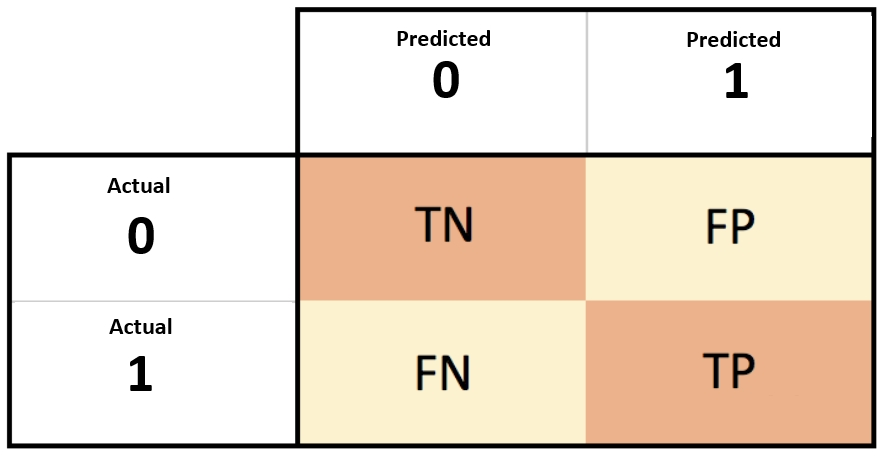

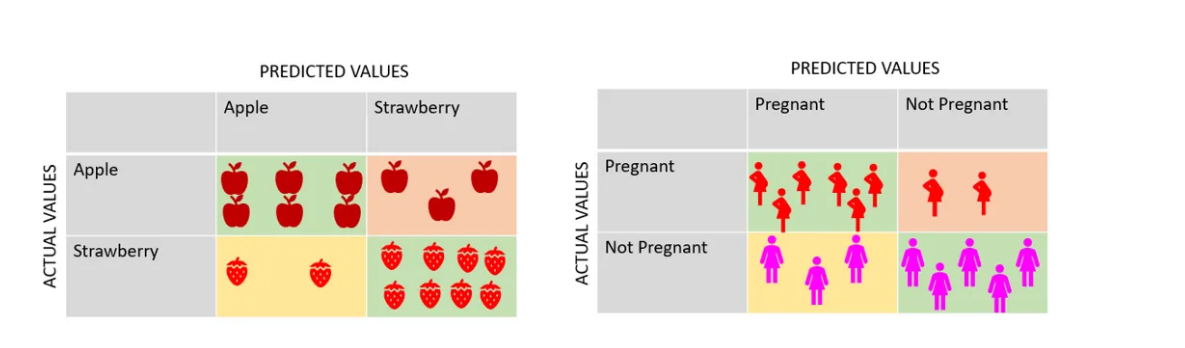

https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

In [42]:
#confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [43]:
cm=confusion_matrix(y_test,y_pred)

Text(54.75, 0.5, 'Predicted Values')

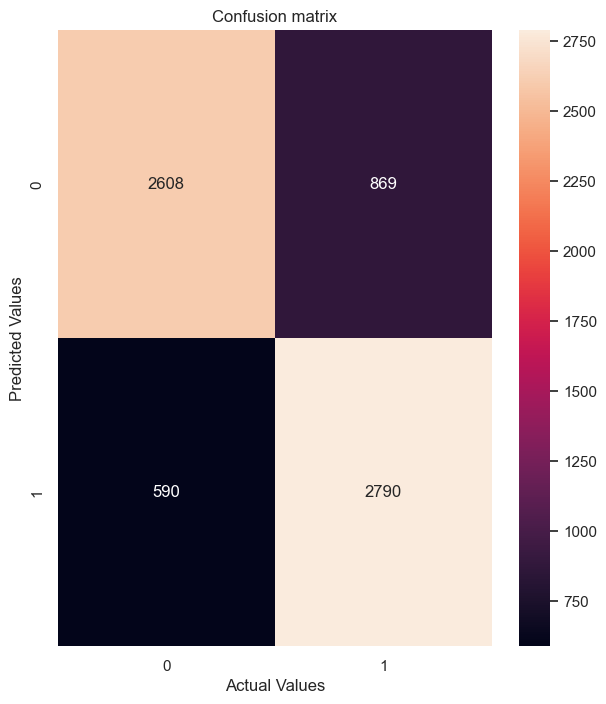

In [44]:
sns.heatmap(cm,annot=True,fmt='g')
plt.title('Confusion matrix')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

## Classification Report

https://medium.com/mlearning-ai/evaluating-classification-models-simplified-b5929146504e

In [45]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78      3477
           1       0.76      0.83      0.79      3380

    accuracy                           0.79      6857
   macro avg       0.79      0.79      0.79      6857
weighted avg       0.79      0.79      0.79      6857



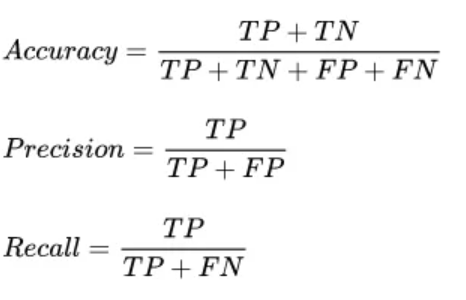

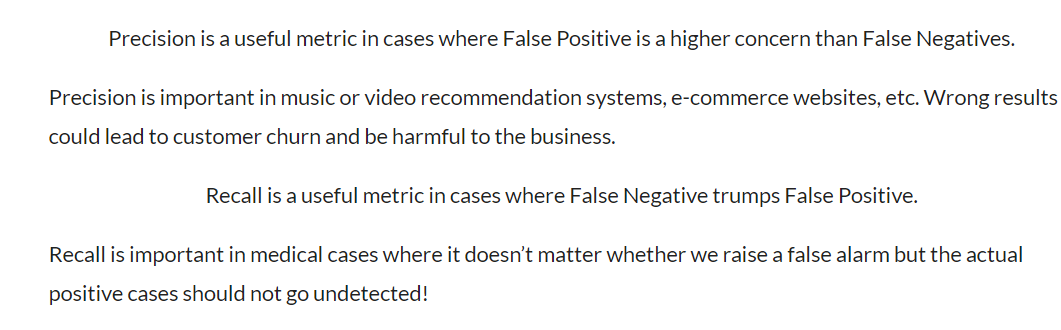

https://towardsdatascience.com/performance-metrics-confusion-matrix-precision-recall-and-f1-score-a8fe076a2262

Use precision when:

False positives are costly: In some problems, a false positive prediction can be costly or have serious consequences. For example, in a medical diagnosis problem, a false positive could result in unnecessary treatment or surgery for the patient. In such cases, it is important to have a high precision to minimize false positives.

There are limited resources: In some problems, there may be limited resources or capacity to handle positive instances. For example, in a spam email detection problem, there may be limited storage or processing power to handle all the spam emails. In such cases, it is important to have a high precision to ensure that only the most important or relevant spam emails are captured.

Use recall when:

False negatives are costly: In some problems, a false negative prediction can be costly or have serious consequences. For example, in a medical diagnosis problem, a false negative could result in a delayed or missed diagnosis, which could have negative consequences for the patient's health. In such cases, it is important to have a high recall to ensure that all positive instances are captured.

Positive instances are rare: In some problems, positive instances may be rare or difficult to detect. For example, in a fraud detection problem, the number of fraudulent transactions may be small compared to the total number of transactions. In such cases, it is important to have a high recall to ensure that all positive instances are captured, even if it means tolerating some false positives.

In general, the choice of precision or recall (or a balance of the two) depends on the specific requirements of the problem being addressed. It's important to understand the trade-offs between precision and recall, and to choose the appropriate metric(s) based on the context of the problem.

## ROC Curve

The Receiver Operating Characteristic (ROC) curve is a graphical representation that illustrates the performance of a binary classification model at various classification thresholds. The objective of the ROC curve is to assess and compare the trade-off between the True Positive Rate (TPR) and False Positive Rate (FPR) across different threshold values.

The ROC curve is created by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at various classification thresholds. The TPR, also known as sensitivity or recall, represents the proportion of positive instances correctly identified by the model. The FPR is the proportion of negative instances incorrectly classified as positive by the model.

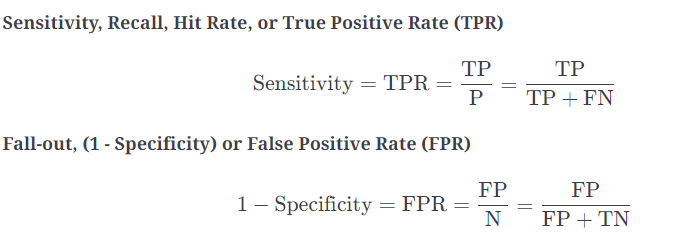

## AUC-ROC Curve
AUC (Area Under the Curve) - ROC (Receiver Operating Characteristics) curve is a performance measurement for a classification model at various classification threshold settings. Basically, it is a probability curve that tells us how well the model is capable of distinguishing between classes.

The AUC ranges from 0 to 1, with 0.5 indicating a random classifier and 1 representing a perfect classifier. A higher AUC value suggests better discriminatory power and overall performance of the model in distinguishing between positive and negative instances.

The AUC is a widely used metric because it has several advantages. It is insensitive to the choice of classification threshold, making it useful for comparing models across different operating points. It also provides a holistic assessment of the model's performance across the entire range of sensitivity and specificity, rather than focusing on a specific threshold.

### Threshold setting Definition
Say we set the threshold to 0.8. This means that if for any given sample our trained model predicts a value higher than 0.8, our output class will be predicted as positive class; otherwise, it will be placed in the negative class.

To create an ROC-AUC curve, we need to vary the classification threshold and observe how it impacts the TPR and FPR.
#### Example

- Threshold = 0.5 (Default):At the default threshold of 0.5, the model classifies emails with a probability greater than 0.5 as spam. Based on this threshold, we calculate the TPR and FPR.

- Threshold = 0.3 (Lower Threshold):Now, let's lower the threshold to 0.3. This means that the model will classify more emails as spam since it requires a lower probability to make a positive prediction. Again, we calculate the TPR and FPR.

- Threshold = 0.7 (Higher Threshold):Next, let's raise the threshold to 0.7. This means that the model will classify fewer emails as spam since it requires a higher probability to make a positive prediction. Once again, we calculate the TPR and FPR.

By repeating this process for various thresholds, we can plot multiple TPR-FPR pairs on the ROC curve.The ROC curve shows the TPR and FPR at different thresholds. 

The ideal threshold depends on the specific requirements of your problem.

- If correctly identifying as many spam emails as possible is crucial (high TPR), you would aim for a higher threshold that reduces the FPR.

- If minimizing false alarms (low FPR) is a priority, you would choose a lower threshold that may sacrifice some TPR.

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score

In [48]:
y_pred_prob=model.predict_proba(X_test)[:,1]

In [49]:
y_pred_prob

array([0.0652294 , 0.39015781, 0.55261468, ..., 0.00977409, 0.50803663,
       0.28803195])

In [51]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [56]:
auc=roc_auc_score(y_test,y_pred_prob)

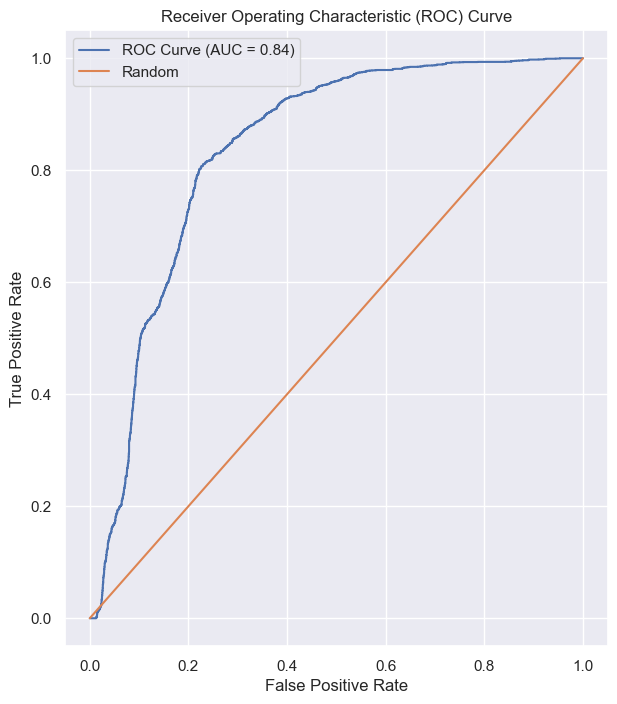

In [58]:
# Plot the ROC curve
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1],label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


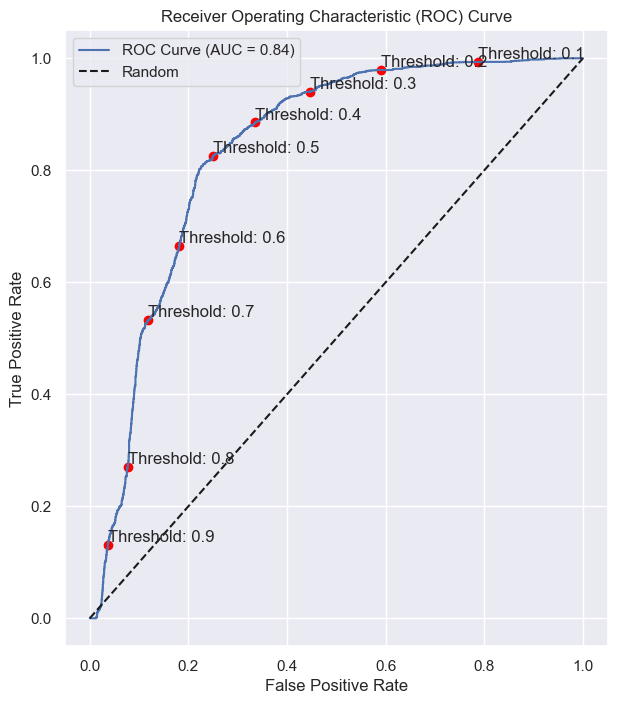

In [59]:
# Plot the ROC curve
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')

# Display specific thresholds on the curve
specific_thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7, 0.8, 0.9]
for threshold in specific_thresholds:
    idx = np.argmin(np.abs(thresholds - threshold))
    plt.scatter(fpr[idx], tpr[idx], marker='o', color='red')
    plt.text(fpr[idx], tpr[idx], f'Threshold: {threshold}', verticalalignment='bottom')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()



In [ ]:
#y_predict_prob_class_1 = y_predict_prob[:,1]

#y_predict_class = [1 if prob > 0.4 else 0 for prob in y_predict_prob_class_1]

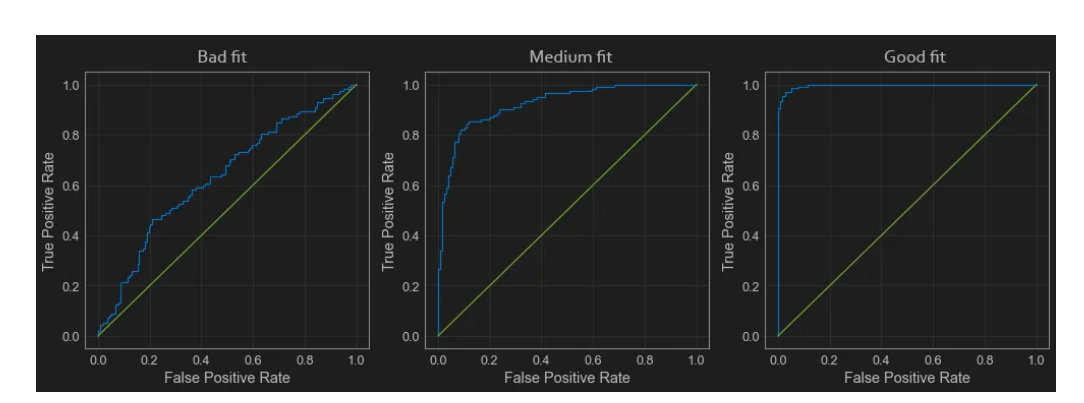

Another way to interpret the ROC curve is by thinking about the separation of the classes,The bad classifier (left) has too much overlap of the classes and therefore is unable to make good predictions, and no threshold is able to separate the classes. As expected, the good classifier (right) has almost no overlap, so we can easily find a good threshold to separate the predictions in their right classes. Finally the middle one is on the middle ground: there is some overlap, but good results can be achieved by setting the threshold accordingly.

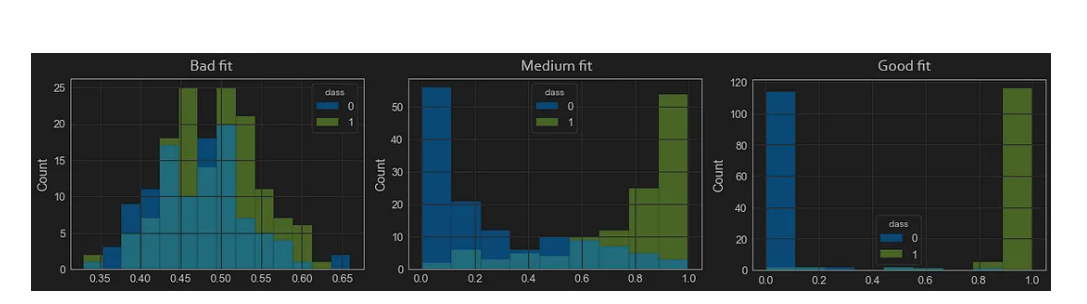

## Questions

- What is logistic regression, and how does it differ from linear regression?
- Explain the logistic regression model equation and its components.
- What is the sigmoid function, and why is it used in logistic regression?
- How do you handle categorical variables in logistic regression?
- How do you evaluate the performance of a logistic regression model?
- What are precision, recall, and F1-score, and why are they important in classification evaluation?
- Explain the concept of threshold in logistic regression and its impact on model performance.
- What is overfitting in logistic regression, and how can it be prevented?
- What are the advantages and limitations of logistic regression?
- How would you handle imbalanced classes in logistic regression?
- How do you handle missing values in logistic regression?
- What is the difference between binary logistic regression and multinomial logistic regression?
- Explain the concept of multicollinearity and its impact on logistic regression. How can it be addressed?
- Can logistic regression be used for solving regression problems with continuous target variables? If not, why?
- What is the purpose of maximum likelihood estimation in logistic regression?
- What are some methods to handle outliers in logistic regression?
- How does logistic regression handle interactions between features?
- What evaluation metrics are commonly used to assess the performance of a classification model?
- How does the ROC curve provide insights into a model's performance? What is the significance of the AUC value?
- What is the difference between micro-average and macro-average in multi-class classification evaluation?